In [1]:
########################################################################################################################################################################

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [86]:
########################################################################################################################################################################

def VStoC(data):
    c_data = []
    for i in data:
        c_data.append(i/50) #VS/ohm
    return c_data

########################################################################################################################################################################
#plotting a histogram quickly from the .csv file
def plotHistFromCsv(filename, bin_num = 50):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"])
    data = VStoC(d)
    plt.figure(figsize = (10,5))
#     hist, bins = np.histogram(data, bins = 30)
    plt.hist(data, bins = bin_num) #alpha- transperency, range - range of the graph 
    plt.title(filename)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()
    

########################################################################################################################################################################
#plotting a histogram from the data given it.    
def plotHist(data, name, bin_num = 50): #name is for the title of the graph
    plt.figure(figsize = (8,6))
#     hist, bins = np.histogram(data, bins = 30)
    plt.hist(data, bins = bin_num) #alpha- transperency, range - range of the graph 
    plt.title(name)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()


########################################################################################################################################################################
#getting just the data from a csv file
def histData(filename, lowlim = -10, uplim = 10):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"])
    data = VStoC(d) #this array can be used to fit a normal distribution
    trunc_data = [] #data with the lower limt applied, if nothing specified, all values will be taken 
    for i in data:
        if i >= lowlim and i <= uplim:
            trunc_data.append(i)
    return trunc_data

########################################################################################################################################################################
#find the idx of the value given in a list
def idxFind(lst, value):
    idx = -1
    
    for i in range(len(lst)):
        if value == lst[i]:
            idx = i
            return idx

########################################################################################################################################################################
#finding the energy resolution from the data given with the graph x limits
def normData(data, lowlim, uplim , filename,bin_num = 50):
    mean,std=norm.fit(data)
    x = np.linspace(lowlim, uplim, 1000)
    y = norm.pdf(x, mean, std)
    plt.figure(figsize = (10,8))
    plt.hist(data, bins = bin_num, normed = True, alpha = 0.4,color = "cornflowerblue")
    plt.plot(x,y, c = "blue")
    
    
    #looking for the peak 
    peak = 0
    peak_area = 0
    ind = 0
    for i in range(len(x)):
        if y[i] >= peak:
            peak = y[i]
        else:
            peak = y[i-1] #this is the peak value, because function decreases after that
            peak_area = x[i]
            ind =i-1 #the index of the peak value
            break
#     plt.scatter(x[ind], y[ind], c ="R")
    halfmax = peak/2
    x_hlf = np.linspace(lowlim, uplim, 1000)
    y_hlf = [halfmax]*1000
#     plt.plot(x_hlf, y_hlf) #plotting the line that goes throughhalf of the graph
    
    closest_dist = 0
    firsthlf_dist = []
    sechlf_dist = []
    for i in range(len(y)):
        if i <= ind:
            firsthlf_dist.append(abs(y[i]-halfmax))
            
        
        if i > ind:
            sechlf_dist.append(abs(y[i]-halfmax))
            
    left_idx = idxFind(firsthlf_dist, min(firsthlf_dist))
    right_idx = idxFind(sechlf_dist, min(sechlf_dist))
            
#     print(left_idx, right_idx)
#     plt.scatter(x[left_idx], y[left_idx], c ="g") #plotting the left intersect
    
#     plt.scatter(x[right_idx+ind], y[right_idx+ ind], c ="g") #plotting the right intersect 
    plt.title(filename)
    annot = "Peak X-value: " + "{:.2e}".format(x[ind])
    plt.annotate(annot, xy=(0.05, 0.9), xycoords='axes fraction')
    plt.xlabel("Charge [C]")
    plt.ylabel("Normalized Counts")
#     plt.xlim(-7e-8,-1.75e-9)

    plt.show()
    
    fullwidth = abs( x[right_idx+ind]- x[left_idx])
    
#     base_area = -2.6304304304304305e-09 #1300v peak
    
#     area_peak = x[ind]
#     alpha = area_peak/base_area

    
    
    resolution = fullwidth / x[ind] #*alpha
    print(filename, "peak:",x[ind], "fwhm:", fullwidth, "resolution:", resolution)
    
    return abs(resolution), fullwidth, x[ind]




    
    
 

In [87]:
########################################################################################################################################################################
data = pd.read_csv("1700v-0.7amp.csv") #creates a dataframe
counts_3 = np.array(data["Ampl"])
bins_3 = np.array(data["Area"])
print(counts_3, "\n", bins_3, "\n", len(counts), len(bins))

########################################################################################################################################################################
#going to make a list of x numbers of the bin value with a function... I need to get my practice back
def new_list(counts, bins):
    tot_counts = 0
    hist_list = [] #new list with all the numbers repeated
    
    if len(counts) != len(bins): #checking so code doesnt run an error 
        print("The lists do not match lengths") 
        return 
    
    
    for i in range(len(counts)):
        times = counts[i] #how many times a certain value will be added to the list 
        value = bins[i]
        tot_counts += times #checking 
        
        if times != 0: #if it has a non zero occurance
            for i in range(times): #loop to add as many times as necessary to the new list 
                hist_list.append(value)
                
    if len(hist_list) == tot_counts:
        
        return hist_list
########################################################################################################################################################################

[   0    4    3    1    6    2    1    1    3    2    1    1    0    1
    1    3    1    2    2    1    4    1    0    1    1    1    3    1
    1    1    2    3    3    1    2    2    2    4   10   12   21  121
  677 2496 4489 3982 1999  731  316  215  177  131   96   85   86   85
   78   70   61   79   59   79   81   75  108  114  134  147  153  191
  292  298  115    2    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0] 
 [-7.22e-08 -7.12e-08 -7.02e-08 -6.92e-08 -6.82e-08 -6.72e-08 -6.62e-08
 -6.52e-08 -6.42e-08 -6.32e-08 -6.22e-08 -6.12e-08 -6.02e-08 -5.92e-08
 -5.82e-08 -5.72e-08 -5.62e-08 -5.52e-08 -5.42e-08 -5.32e-08 -5.22e-08
 -5.12e-08 -5.02e-08 -4.92e-08 -4.82e-08 -4.72e-08 -4.62e-08 -4.52e-08
 -4.42e-08 -4.32e-08 -4.22e-08 -4.12e-08 -4.02e-08 -3.92e-08 -3.82e-08
 -3.72e-08 -3.62e-08 -3.52e-08 -3.42e-08 -3.32e-08 -3.22e-08 -3.12e-08
 -3.02e-08 -2.92e-08 -2.82e-08 -2.72e-08 -2.62e-08 -2.52e-08 -2

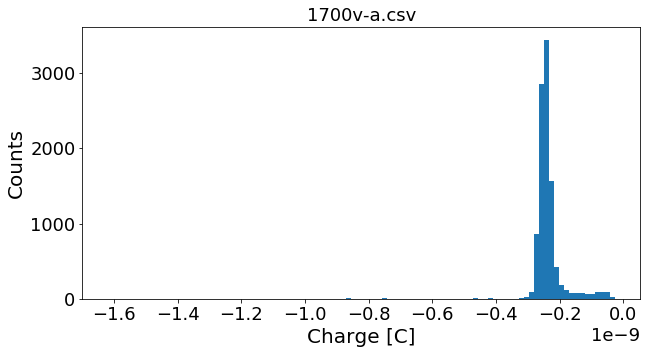

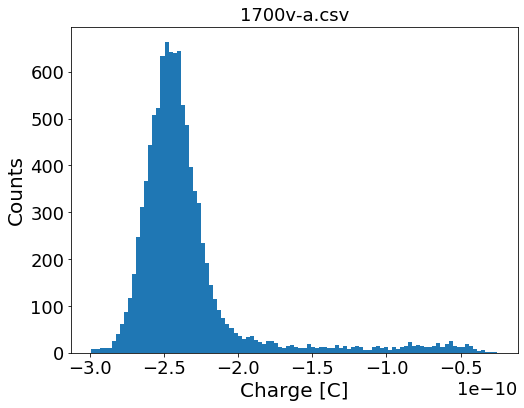

[  9   8  11  11  11  25  41  62  87 118 169 248 312 367 444 507 522 633
 663 641 639 644 529 487 397 346 319 234 192 145 115  91  74  61  52  43
  36  30  33  36  28  22  19  25  26  21  13  11  14  16  12  11  11  19
  13  10  12  12  11  11  16  11  15   9  13  15  12   6   7  12  14  11
  12   6  12   9  12  14  22  15  16  15  13  13  15  20  12  19  25  14
  13  12  19  14   9   3   5   2   1   1] [-2.98676000e-10 -2.95942672e-10 -2.93209344e-10 -2.90476016e-10
 -2.87742688e-10 -2.85009360e-10 -2.82276032e-10 -2.79542704e-10
 -2.76809376e-10 -2.74076048e-10 -2.71342720e-10 -2.68609392e-10
 -2.65876064e-10 -2.63142736e-10 -2.60409408e-10 -2.57676080e-10
 -2.54942752e-10 -2.52209424e-10 -2.49476096e-10 -2.46742768e-10
 -2.44009440e-10 -2.41276112e-10 -2.38542784e-10 -2.35809456e-10
 -2.33076128e-10 -2.30342800e-10 -2.27609472e-10 -2.24876144e-10
 -2.22142816e-10 -2.19409488e-10 -2.16676160e-10 -2.13942832e-10
 -2.11209504e-10 -2.08476176e-10 -2.05742848e-10 -2.03009520e-10
 -2.0027

In [141]:
########################################################################################################################################################################

# data = pd.read_csv() #creates a dataframe
# counts = np.array(data["Ampl"])
filename = '1700v-a.csv'
# filename = 'Project_0.6MeV.csv'
# bins = np.array(data["Area"])

plotHistFromCsv(filename, bin_num =100)
# plotHistFromCsv_1(filename_1, bin_num =100)
    
tr_data = histData(filename, -3.0e-10, 0)
plotHist(tr_data, filename, 100)

import numpy as np



n, bins = np.histogram(tr_data, bins=100)
print(n,bins)
bins = bins[:-1]
print(len(n), len(bins[:-1]))

import pandas as pd

data_7 = {'count':n,
        'bin': bins
        }

df = pd.DataFrame(data_7, columns= ['count', 'bin'])

df.to_csv (r'/Users/faith/Documents/2021 Spring/LEGEND/EGun/export.csv', index = False, header=True)

# h = new_list(counts, bins)
# plt.figure(figsize = (8,6))
# plt.hist(h, bins = 45)
# plt.title("1700V PMT with 0.5Amp to EGun")
# plt.xlabel("Area of Signal [nVs]")
# plt.ylabel("Counts")
# plt.xlim(-2.5e-8, 0.25e-8)
# plt.show()

########################################################################################################################################################################

/Users/faith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


ValueError: Illegal argument(s) to subplot: (array([402.08, 403.36, 404.64, 405.92, 407.2 , 408.48, 409.76, 411.04,
       412.32, 413.6 , 414.88, 416.16, 417.44, 418.72, 420.  , 421.28,
       422.56, 423.84, 425.12, 426.4 , 427.68, 428.96, 430.24, 431.52,
       432.8 , 434.08, 435.36, 436.64, 437.92, 439.2 , 440.48, 441.76,
       443.04, 444.32, 445.6 , 446.88, 448.16, 449.44, 450.72, 452.  ,
       453.28, 454.56, 455.84, 457.12, 458.4 , 459.68, 460.96, 462.24,
       463.52, 464.8 , 466.08, 467.36, 468.64, 469.92, 471.2 , 472.48,
       473.76, 475.04, 476.32, 477.6 , 478.88, 480.16, 481.44, 482.72,
       484.  , 485.28, 486.56, 487.84, 489.12, 490.4 , 491.68, 492.96,
       494.24, 495.52, 496.8 , 498.08, 499.36]), [151, 151, 151, 302, 2416, 8456, 18724, 29899, 42432, 54890, 64026, 72483, 75654, 80411, 84488, 88716, 91661, 93095, 93775, 94077, 93397, 93850, 92793, 91283, 89849, 88263, 85847, 85167, 82525, 80637, 78146, 75201, 72181, 68557, 65838, 64026, 59270, 55721, 52927, 50511, 45302, 41300, 39488, 36241, 33146, 31711, 28615, 26954, 25369, 22651, 21518, 19328, 17441, 17063, 16006, 15025, 14345, 13364, 12911, 12231, 11552, 10872, 10419, 9588, 9286, 8682, 8305, 7776, 7474, 6719, 6568, 5738, 5738, 4832, 4681, 3926, 3473])

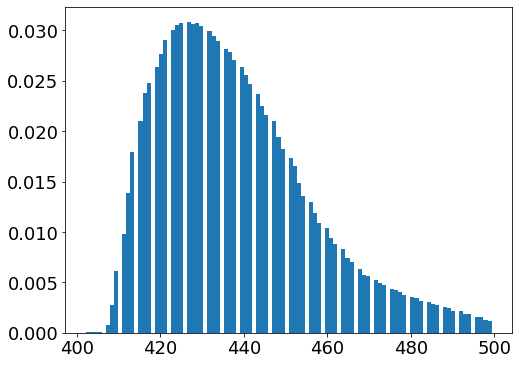

In [140]:
#  plt.figure(figsize = (8,6))
# #     hist, bins = np.histogram(data, bins = 30)
#     plt.title(name)
#     plt.xlabel("Charge [C]")
#     plt.ylabel("Counts")
#     plt.show()

########################################################################################################################################################################

data = pd.read_csv('Project_0.6MeV.csv') #creates a dataframe
# counts = np.array(int(data["Count"]))
counts = []
for i in range(len(data["Count"])):
#     print(data["Count"][i])
    counts.append(int(data["Count"][i]))

########################################################################################################################################################################

bins = np.array(data["Bin"])
h = new_list(counts, bins)
plt.figure(figsize = (8,6))
plt.hist(h, bins = 100, normed = True)
# plt.hist(tr_data, bins = 100) #alpha- transperency, range - range of the graph 
plt.subplot(bins, counts)

plt.title("1700V PMT with 0.6Amp to EGun")
plt.xlabel("Charge [C]")
plt.ylabel("Counts")
plt.show()

########################################################################################################################################################################

In [130]:
########################################################################################################################################################################
ig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.hist(tr_data, bins = 100)
plt.show()
########################################################################################################################################################################

/Users/faith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/faith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

In [25]:
def standardize(data):
    for a in range(2):
        print("a:",a)
        span = max(data[0][a]) - min(data[0][a])
        min_ = min(data[0][a])
        for idx in range(len(data)):
            standardize = (max(data[idx][a]) - min(data[idx][a]))/span
            data[idx][a] = [i/standardize + min_ - min([i/standardize 
                            for i in data[idx][a]]) for i in data[idx][a]]
    return data

limits [(-7.22e-08, 2.6800000000000002e-08), (0, 4489)]
a: 0
a: 1


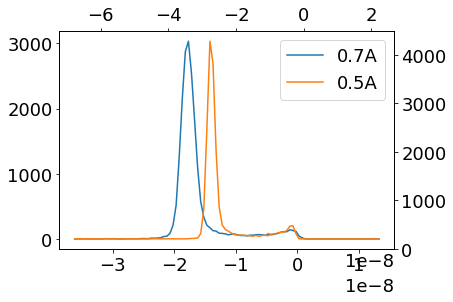

<Figure size 576x432 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
data = [[bins,counts], 
        [bins_3,counts_3]]
limits = [(min(data[1][a]), max(data[1][a])) for a in range(2)]

print("limits", limits)

norm_data = standardize(data)

fig, ax = plt.subplots()
labels = ["0.7A", "0.5A"]
t = 0

for x, y in norm_data:
    ax.plot(x, y, label = labels[t])
    t+= 1

ax2, ax3 = ax.twinx(), ax.twiny()
ax2.set_ylim(limits[1])
ax3.set_xlim(limits[0])
ax.legend()

plt.figure(figsize = (8,6))

plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0.00160506 0.00160506 0.00160506 0.00321013 0.0256821  0.08988788
 0.19903654 0.31781664 0.4510434  0.58346656 0.68057723 0.77046511
 0.80417359 0.85473526 0.89807413 0.94301701 0.9743179  0.98956602
 0.99678987 1.         0.99277721 0.9975924  0.98635589 0.97030524
 0.95505606 0.93820182 0.91251972 0.90529693 0.87720723 0.85714286
 0.83065823 0.79935734 0.76725498 0.7287313  0.69983907 0.68057723
 0.63001556 0.59229548 0.56260072 0.53691755 0.48154069 0.43900435
 0.41974357 0.38523255 0.35232766 0.33707848 0.30417359 0.28651682
 0.26966257 0.24077035 0.22873236 0.20545786 0.18539349 0.18138082
 0.17014431 0.15971139 0.15248753 0.14205461 0.13723942 0.13001556
 0.12279277 0.11556998 0.11075478 0.10192587 0.09871574 0.09229548
 0.08828281 0.08266402 0.079453

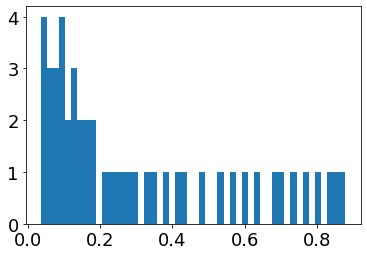

In [162]:
# lowest = 0
# total_hists = []
data = pd.read_csv('sim.csv') #creates a dataframe
counts_s = []


for i in range(len(data["sim_x"])):
    
#     print(data["sim_x"][i])
#     print(data["Count"][i])
    counts_s.append(int(data["sim_x"][i]))
bins_s = np.array(data["sim_y"])
print(counts_s, bins_s)
h_s = new_list(counts_s, bins_s)


# for file in file_names:
#     data = pd.read_csv(file) #creates a dataframe
#     counts = np.array(data["Ampl"])
#     bins = np.array(data["Area"])
#     print( file, len(counts), len(bins))
#     hist_list = new_list(counts, bins)
#     print(len(hist_list))
#     total_hists.append(hist_list)
# for h in total_hists:
#     print(h)
plt.figure()
plt.hist(h_s, bins = 50)
plt.show()

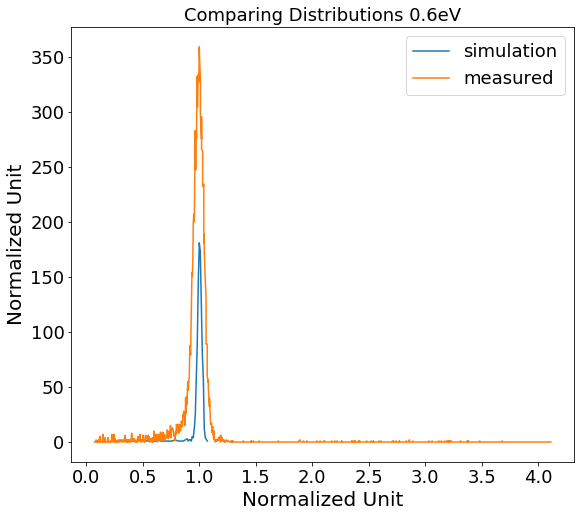

In [190]:
d = pd.read_csv('simtomeas2.csv') #creates a dataframe
# print(d['sim_y'])

plt.figure(figsize = (9,8))
#     hist, bins = np.histogram(data, bins = 30)
plt.plot(d['normbin_0.6s'],d['event_0.6s'], label = "simulation")
plt.plot(d['normbin_0.6m'],d['event_0.6m'], label ="measured") 

plt.title("Comparing Distributions 0.6eV")
plt.xlabel("Normalized Unit")
plt.ylabel("Normalized Unit")
# plt.ylabel("Counts")
plt.legend()
plt.show()

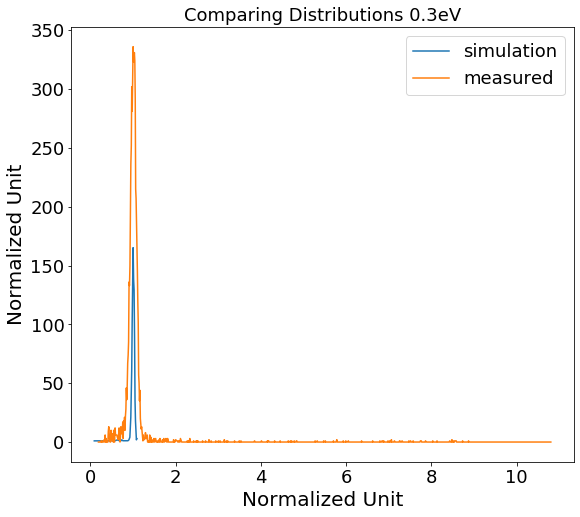

In [203]:
d = pd.read_csv('simtomeas2.csv') #creates a dataframe
# print(d['sim_y'])

plt.figure(figsize = (9,8))
#     hist, bins = np.histogram(data, bins = 30)
plt.plot(d['normbin_0.3s'],d['event_0.3s'], label = "simulation")
plt.plot(d['normbin_0.3m'],d['event_0.3m'], label ="measured") 

plt.title("Comparing Distributions 0.3eV")
plt.xlabel("Normalized Unit")
plt.ylabel("Normalized Unit")
# plt.ylabel("Counts")
plt.legend()
plt.show()

In [219]:
def cutrange(bindata, eventdata, xlowlim, xuplim):
    newbin = []
    newevent = []
    
    for i in range(len(bindata)):
        if bindata[i] < xuplim and bindata[i] > xlowlim:
            newbin.append(bindata[i])
            newevent.append(eventdata[i])
        else:
            continue
            
#     newevent = newevent/max(newevent)
        
    return newbin, newevent

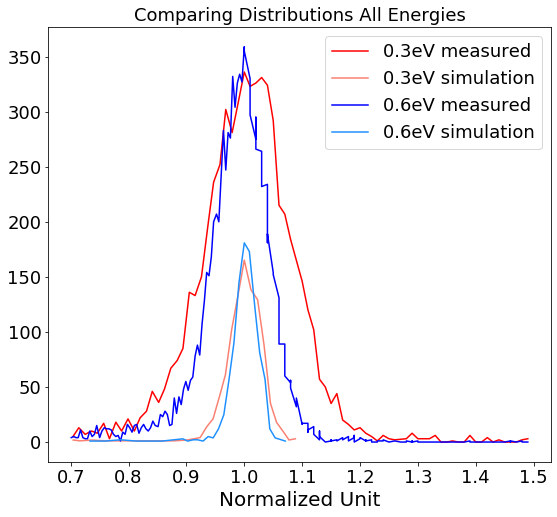

In [221]:
d = pd.read_csv('simtomeas2.csv') #creates a dataframe
# print(d['sim_y'])

plt.figure(figsize = (9,8))

lowxlim = 0.7
upxlim = 1.5
new_normbin_3s, new_event_3s = cutrange(d['normbin_0.3s'],d['event_0.3s'], lowxlim, upxlim)
new_normbin_3m, new_event_3m = cutrange(d['normbin_0.3m'],d['event_0.3m'], lowxlim, upxlim)

new_normbin_6s, new_event_6s = cutrange(d['normbin_0.6s'],d['event_0.6s'], lowxlim, upxlim)
new_normbin_6m, new_event_6m = cutrange(d['normbin_0.6m'],d['event_0.6m'], lowxlim, upxlim)



#     hist, bins = np.histogram(data, bins = 30)
# plt.plot(d['normbin_0.3s'],d['event_0.3s'], label = "simulation")
# plt.plot(d['normbin_0.3m'],d['event_0.3m'], label ="measured") 
# plt.plot(d['normbin_0.6s'],d['event_0.6s'], label = "simulation")
# plt.plot(d['normbin_0.6m'],d['event_0.6m'], label ="measured") 
plt.plot(new_normbin_3m, new_event_3m, label = "0.3eV measured", c= "red")
plt.plot(new_normbin_3s, new_event_3s, label = "0.3eV simulation", c = "salmon")

plt.plot(new_normbin_6m, new_event_6m, label = "0.6eV measured", c = "blue")
plt.plot(new_normbin_6s, new_event_6s, label = "0.6eV simulation", c = "dodgerblue")


plt.title("Comparing Distributions All Energies")
plt.xlabel("Normalized Unit")
# plt.ylabel("Normalized Unit")
# plt.ylabel("Counts")
plt.legend()
plt.show()